# <font color='blue'>PROJET 2  DS Analysez des données de systèmes éducatifs <font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import matplotlib.gridspec as gridspec

In [2]:
!pip install missingno

In [3]:
# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Seaborn       : ' + sns.__version__)



import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
NumPy         : 1.21.5
Pandas        : 1.4.2
Seaborn       : 0.11.2
Lancé le           : 2022-08-11T18:38:54.302085


#### 1.Introduction

### ACADEMY :

Academy est notre entreprise, une start-up de la EdTech qui propose des formations en ligne pour les lycéens et les enseignements supérieurs.

#### 3 problématiques :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Pré-Analyse :

 I ) Valider la qualité de ce jeu de données comporte-t-il beaucoup de données manquantes, dupliquées ?

 II) Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

 Jeu de donnée 1: EdStatsData - 886930 rows × 70 columns

 Jeu de donnée 2: EdStatsCountry - 241 rows × 32 columns

 Jeu de donnée 3: EdStatsCountry-Series -- 613 rows × 4 columns


 Jeu de donnée 4: EdStatsFootNote - 643637 rows x 5 columns

 Jeu de donnée 5: EdStatsSeries - 3665 rows × 21 columns

III) Sélectionner les informations qui semblent pertinentes pour répondre à la problématique  / 
(quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

IV) Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde-(moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### Questions :

Phase-1 : quelles sont les variables permettant de quantifier le potentiel d'un pays en vue d'un dévellopement commercial ? (au moins 4 variables)

Phase-2 : qualités des données (inutiles de toutes les garder  / petit pays,données anciennes & prospective) S'assurer que l'ensemble des variables sélectionner le remplissage 
est complète pour la quasi-totalité des pays // filtre sur une population min permerttrai de faire cela. 

(BONUS) Établir un score d'attractivité par pays. 
_________________________________________________________________________________

Indicateurs de données présentes sur l'ensemble des tableaux : 

01 Éducation de la petite enfance
02 Primaire
03 Secondaire
04 Formation professionnelle et post-secondaire non tertiaire
05 Tertiaire
06 Enseignants
07 Dépenses
08 Alphabétisation
09 Résultats d'apprentissage
10 Réalisation
11 compétences technologiques
12 Population
13 Travail
14 Contexte
15 Sécurité/violence à l'école
16 SABRE
17 Réalisation mondiale
18 Pauvreté d'apprentissage
19 Égalité en éducation

01 Early Childhood Education
02 Primary
03 Secondary
04 Vocational & Post-secondary Non-Tertiary
05 Tertiary
06 Teachers
07 Expenditures
08 Literacy
09 Learning Outcomes
10 Attainment
11 Technology Skills
12 Population
13 Labor
14 Background
15 School Safety/Violence
16 SABER
17 Global Achievement
18 Learning Poverty
19 Education Equality
_________________________________________________________________________________

#### Phase 1 :

Les 3 - 4 indicateurs/Variables susceptibles de nous intéresser afin de répondre à notre problématique :

- Selon que l'on souhaite répondre à notre problématique seront :

    - La liste des Pays et Régions  : "Country Name" ," Country Code"
    - Les indicateurs qui ont au moins 70% à 80% de données significatives pour pouvoir être exploitable . 
    
    - Des indicateurs : démographique et Sociaux - Économique :

Exemple : * les populations cibles ( étudiants | 16- 24ans -> titre indicatif).
         
          * Dépenses par individus | accès aux nouvelles technologies .
          
                 -> "Indicator Name" ,"Indicator Code" & "Year"


#### Phase-2 : Qualités des données - Pré-Analyse :

* Valeurs manquante,Doublons,Dimensions,Type, Descriptions des jeu de données. 

1) DataState |2) DataSeries|3) DataCountry|4) DataCountry |5)Datafoot|6) DataCountryS

In [4]:
#1) Jeu de donnée : EdStatsData
dataState = pd.read_csv('EdStatsData.csv')
dataState.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Supprimer la dernière colonne du tableau
dataState["Unnamed: 69"].unique()
#Supprimer la dernière colonne du tableau
dataStates = dataState.drop(columns="Unnamed: 69")

In [6]:
#Résumé des variables qualitatives
dataStates.describe(exclude=[np.number])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


In [7]:
#Présence dans la colonne "Country Name" : Zone |Pays | Zone de revenue
dataStates["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [8]:
dataState["Indicator Name"].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [9]:
dataState["Country Name"].nunique()

242

In [10]:
dataState["Indicator Name"].nunique()

3665

In [11]:
dataState["Indicator Code"].nunique()

3665

In [12]:
#Jeu de donnée 1 : DataState
dataStates.isna().sum().sort_values(ascending=False) #Quantité de "Nan" / variables

2017              886787
2016              870470
1971              851393
1973              851385
1972              851311
                   ...  
2010              644488
Country Code           0
Indicator Code         0
Indicator Name         0
Country Name           0
Length: 69, dtype: int64

In [13]:
#Jeu de donnée 1:Pas de doublons
dataState[dataStates.duplicated(keep=False)].shape[0];

In [14]:
#Type de donnée :jeu de donnée-1 
dataState.dtypes


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [15]:
#Dimension du tableau // DataState (Jeu de données 1)
dataState.shape

(886930, 70)

<Figure size 1080x720 with 0 Axes>

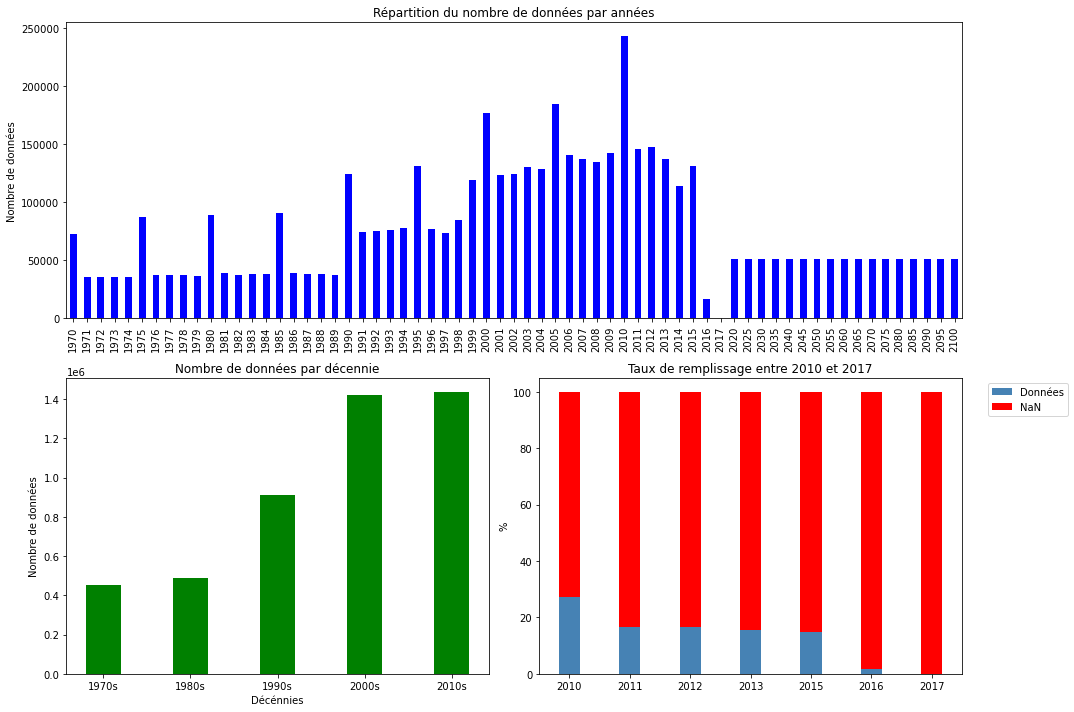

In [16]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

# Graphique 1:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)
# Graphique ligne 1, sur les 2 colonnes ------------------
ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = dataState.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='Blue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

# Graphique  2: 
ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie, les années 70, 80...
decade=dataState.loc[:,'1970':'2020'].copy().count()
ans=['1970s','1980s','1990s','2000s','2010s']
for i in range(5):
    j=i*10
    k=j+10
    decade[ans[i]]=decade[j:k,].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4   
ax2.bar(decade[ans].index, decade[ans].values, width, color='Green')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Décénnies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)

# Graphique 3
ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot=dataState.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees=['2010','2011','2012','2013','2015','2016','2017']
nb_nonnul=dataState.copy()[annees].count()
df_2010s = pd.DataFrame({'annee':nb_nonnul.index, 'nb_nonnul':nb_nonnul.values})
# Taux de données non nulles par année de la décénnie 2010
df_2010s['%_nonnul']=round((df_2010s['nb_nonnul'])*100/nb_tot,2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan']=round(100-df_2010s['%_nonnul'],2)
width = 0.35      
annes=df_2010s.index
taux_remplissage=df_2010s['%_nonnul']
taux_nan=df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage, label='NaN', color='Red')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1),loc = 2)
ax3.grid(False)

plt.tight_layout()
plt.show()

#### Note :
- La décennie des années 2010 est la période où nous avons le plus de données à disposition. C'est donc période qui va nous intéresser pour la suite de notre étude.

- Après l'année 2015, nous avons d'importante et de constante de quantité donnée manquante (normale, l'étude se déroule dans les années 2018.).

On observe un pic de données tous les 5 ans.

Les données sont doublées tous les 10 ans à partir de 1990.

La dernière année exploitable est 2015.

Les années au-delà des années 2020 sont des années de prédiction.
 
 

In [17]:
#2)Jeu de donnée : EdStatsCountry
dataCountry = pd.read_csv('EdStatsCountry.csv')
dataCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [18]:
#Jeu de donnée 2: 
dataCountry.isna().sum().sort_values(ascending=False)

Unnamed: 31                                          241
National accounts reference year                     209
Alternative conversion factor                        194
Other groups                                         183
Latest industrial data                               134
Vital registration complete                          130
External debt Reporting status                       117
Latest household survey                              100
Latest agricultural census                            99
Lending category                                      97
PPP survey year                                       96
Special Notes                                         96
Source of most recent Income and expenditure data     81
Government Accounting concept                         80
Latest water withdrawal data                          62
IMF data dissemination standard                       60
Balance of Payments Manual in use                     60
Latest trade data              

In [19]:
#Jeu de donnée 2:Pas de doublons
dataCountry.duplicated(keep=False).sum()



0

In [20]:
#Jeu de donnée 2:Pas de doublons
doublons = dataCountry[dataCountry.duplicated(['Country Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur le code pays : {nb_doublons_code_pays}')

Nombre de doublons sur le code pays : 0


In [21]:
#Type de donnée :jeu de donnée-2
dataCountry.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [22]:
#Dimension du tableau // DataCountry (Jeu de données 2)
dataCountry.shape

(241, 32)

<AxesSubplot:>

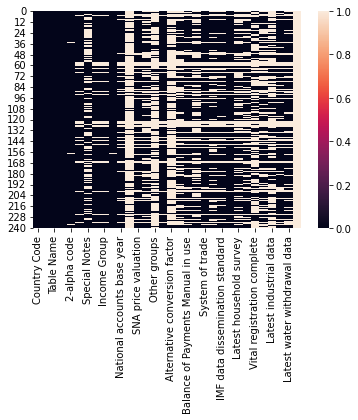

In [23]:
#VISUALISATION DES VALEURS MANQUANTES
sns.heatmap(dataCountry.isna())

D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par groupe de revenus')

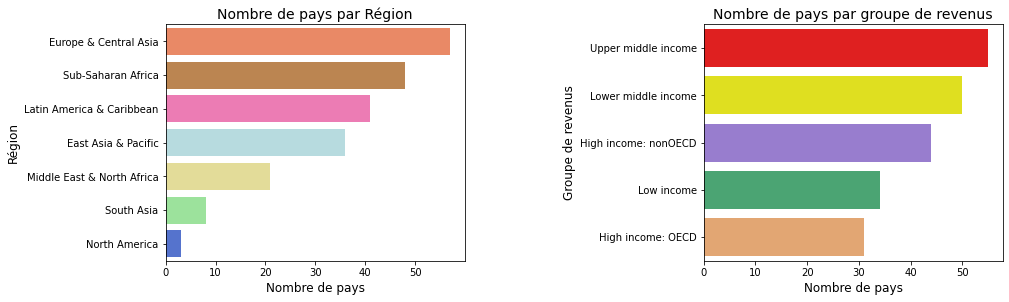

In [24]:
fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

#Graphique 1:
plt.subplot(grid[0, 0])

# Regroupement des pays par régions
nb_pays_par_region=dataCountry.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)

#Graphique 2:
plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=dataCountry.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Red','Yellow','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14)


In [25]:
#3)Jeu de donnée : EdStatsCountry-Series
dataCountryS = pd.read_csv('EdStatsCountry-Series.csv')
dataCountryS

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [26]:
#Jeu de donnée 3: dataCountry-Series
dataCountryS.isna().sum().sort_values(ascending=False)

Unnamed: 3     613
CountryCode      0
SeriesCode       0
DESCRIPTION      0
dtype: int64

In [27]:
#Supprimer la dernière colonne du tableau
dataCountryS["Unnamed: 3"].unique()
#Supprimer la dernière colonne du tableau
dataCountrySs = dataCountryS.drop(columns="Unnamed: 3")

In [28]:
#Jeu de donnée 3:Pas de doublons
dataCountryS.duplicated(keep=False).sum()

0

In [29]:
#Jeu de donnée 3:Pas de doublons
dataCountrySs[dataCountrySs.duplicated(keep=False)].shape[0];

In [30]:
#Type de donnée :jeu de donnée-3
dataCountryS.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [31]:
#Dimension du tableau // DataCountryS (Jeu de données 3)
dataCountryS.shape

(613, 4)

In [32]:
#Supprimer la dernière colonne du tableau
dataCountryS["Unnamed: 3"].unique()
#Supprimer la dernière colonne du tableau
dataCountrySs = dataCountryS.drop(columns="Unnamed: 3")

<AxesSubplot:>

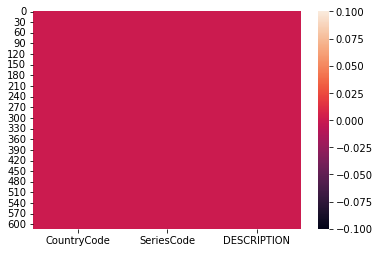

In [33]:
#VISUALISATION DES VALEURS MANQUANTES
sns.heatmap(dataCountrySs.isna())

In [34]:
#4)Jeu de donnée : EdStatsFootNote
dataFoot = pd.read_csv('EdStatsFootNote.csv')
dataFoot.tail()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [35]:
#Jeu de donnée 4: EdStatsFootNote
dataFoot.isna().sum().sort_values(ascending=False)

Unnamed: 4     643638
CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
dtype: int64

In [36]:
#Supprimer la dernière colonne du tableau
dataFoot["Unnamed: 4"].unique()
#Supprimer la dernière colonne du tableau
dataFoots = dataFoot.drop(columns="Unnamed: 4")

In [37]:
#Jeu de donnée 4:Pas de doublons
dataFoot.duplicated(keep=False).sum()

0

In [38]:
#Type de donnée :jeu de donnée-4
dataFoot.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [39]:
#Dimension du tableau // DataFoot (Jeu de données 4)
dataFoot.shape

(643638, 5)

<AxesSubplot:>

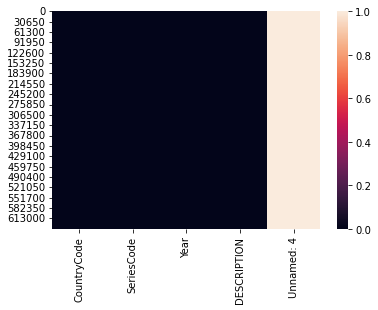

In [40]:
#VISUALISATION DES VALEURS MANQUANTES
sns.heatmap(dataFoot.isna())

In [41]:
#5)Jeu de donnée : EdStatsSeries
dataSeries = pd.read_csv('EdStatsSeries.csv')
dataSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Jeu de donnée 5: EdStatsSeries
dataSeries.isna().sum().sort_values(ascending=False)

Unnamed: 20                            3665
Notes from original source             3665
License Type                           3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Topic                                     0
Source                                    0
Long definition                           0
Indicator Name                            0
Series Code                               0
dtype: int64

In [43]:
#On vérifie qu'on a le même nombre d'indicateurs dans les 2 datasets
dataSeries['Series Code'].nunique() == dataState['Indicator Code'].nunique()

True

In [44]:
#Supprimer la dernière colonne du tableau
dataSeries["Unnamed: 20"].unique()
#Supprimer la dernière colonne du tableau
dataSeriess = dataSeries.drop(columns="Unnamed: 20")

In [45]:
#Jeu de donnée 5:Pas de doublons
dataSeries.duplicated(keep=False).sum()

0

<AxesSubplot:>

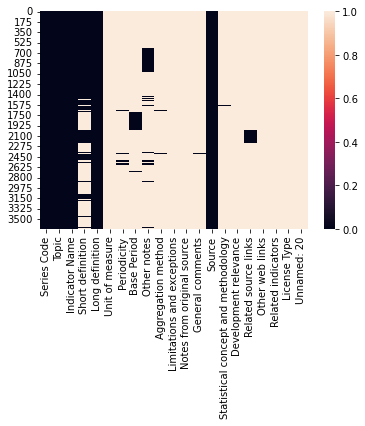

In [46]:
#VISUALISATION DES VALEURS MANQUANTES
sns.heatmap(dataSeries.isna())

Analyses des différents jeu de données : les noms et contenues des colonnes pour un aperçu des contenus des différents Dataframes


In [47]:
dataState["Indicator Name"].unique()
#II)Décrire les informations contenues dans le jeu de données -> Donnée donnant des le taux de scolarisation selon les ages ,sexe et années . 

#aux net de scolarisation ajusté, premier cycle du secondaire, les deux sexes (%)',
#'Taux net de scolarisation ajusté, premier cycle du secondaire, filles (%)',
# 'Taux net de scolarisation ajusté, premier cycle du secondaire, indice de parité entre les sexes (IPS)',
#..., 'Taux d'alphabétisation des jeunes, population 15-24 ans, femmes (%)',
# 'Taux d'alphabétisation des jeunes, population 15-24 ans, indice de parité entre les sexes (IPS)',
# 'Taux d'alphabétisation des jeunes, population 15-24 ans, hommes (%)

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

2°) Décrire les informations contenues dans le jeu de données ->
Donnée donnant le taux de scolarisation selon les âges , sexe et années.

-Taux net de scolarisation ajusté, premier cycle du secondaire, les deux sexes (%)',

-Taux net de scolarisation ajusté, premier cycle du secondaire, filles (%)',

-Taux net de scolarisation ajusté, premier cycle du secondaire, indice de parité entre les sexes (IPS)',

-Taux d'alphabétisation des jeunes, population 15-24 ans, femmes (%)',

-Taux d'alphabétisation des jeunes, population 15-24 ans, indice de parité entre les sexes (IPS)',

-Taux d'alphabétisation des jeunes, population 15-24 ans, hommes (%)

In [48]:
#2°) Description des jeux données
dataCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

Code pays Nom abrégé Nom du tableau Nom long Code alpha-2 Unité monétaire Notes spéciales Région Groupe de revenu Code WB-2 ... Norme de diffusion des données du FMI Dernier recensement de la population Dernière enquête auprès des ménages Source des données les plus récentes sur les revenus et les dépenses Enregistrement de l'état civil terminé Dernier recensement agricole Dernières données industrielles Dernières données commerciales Dernières données sur les prélèvements d'eau

In [49]:
#3°) Description des jeux de données
dataCountryS["DESCRIPTION"].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

 Ici : le jeu de donné num 3° (footnote) nous donne des "Informations" sur l'année d'origine des données et description des données.

In [50]:
#4°) dataFoot["DESCRIPTION"].unique()
#dataFood = Origine des récolte des données par année.

In [51]:
#5°) Tableau avec des données | l'ordre "sociaux-économique":  
dataSeries["Short definition"].unique()


array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/',
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) f

In [52]:
#5°) Nom des variables/Colonne présent dans le jeu de donnée 5: 
dataSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

## Pré-Analyse  -- BILAN
_____________

#### Legendes : 
Etape 1° : Dimension des jeux de données | Etape 2° : Description des jeux de données |    Etape 3°: Doublons / valeurs manquantes 
- 1°(country) possède: 241 lignes et 32 colonnes.

2°-3°: Information globale sur l'économie selon certains indicateurs par pays du Monde. Présence de valeur manquante pour certains pays | Pas de doublons. 

- 1°(countryseries) possède: 613 lignes et 4 colonnes.

2°-3°: "EdStatsCountry-Series" contient la source des données des informations contenues dans "EdStatsCountry" Les valeurs manquantes correspondent à la colonne "Unnamed: 3" qui sont vide et peuvent donc être supprimées sans perte d'information | Aucun doublon. 

- 1°(dataState) possède: 886930 lignes et 19 colonnes.

2°-3°: Jeu de donnée donnant l'évolution de plusieurs indicateurs pour tous les pays du monde et Régions/zones du monde .Il y a énormément de donnée manquante en ce qui concerne certaine date [comprise entre les année 1970 et 2100] | Pas de doublons. 

- 1°(footnote) possède: 643638 lignes et 4 colonnes.

2°-3°: "Footnote" donne des informations sur l'année d'origine des données. "Unnamed:4" est une colonne vide qui peut être supprimé sans perte d'information. | Pas de doublons. 

- 1°(dataseries) possède: 3665 lignes et 21 colonnes.

2°-3°: Jeu de données descriptives sur des indicateurs socio-économiques.Présence de valeur manquante notamment 6 colonnes ou l'ensemble des valeurs manques (ils peuvent être supprimés ) - 10 autres colonnes dont + 80% des valeurs manquantes enfin presque 50% pour la colonne "Short definition" | Pas de doublon. 

#### Sélections des indicateurs pertinents :

OR d'après la description des données de "EdStastsData.csv", la décennie 2010 est la plus fournie en données sur la période 2010-2015

C'est cette période que nous retiendrons : "2010-2015"; pour la suite de nos analyses.

In [53]:
dataStates.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [54]:
dataState['1970s'] = dataState[[str(year) for year in range(1970,1980,1)]].mean(1)
dataState['1980s']= dataState[[str(year) for year in range(1980,1990,1)]].mean(1)
dataState['1990s'] = dataState[[str(year) for year in range(1990,2000,1)]].mean(1)
dataState['2000s'] = dataState[[str(year) for year in range(2000,2010,1)]].mean(1)
dataState['2010s'] = dataState[[str(year) for year in (2010,2011,2012,2013,2014,2015,2016,2017)]].mean(1)
dataState['2020s'] = dataState[[str(year) for year in (2020,2025)]].mean(1)
dataState['2030s'] = dataState[[str(year) for year in (2030,2035)]].mean(1)
dataState['2040s'] = dataState[[str(year) for year in (2040,2045)]].mean(1)
dataState['2050s'] = dataState[[str(year) for year in (2050,2055)]].mean(1)
dataState['2060s'] = dataState[[str(year) for year in (2060,2065)]].mean(1)
dataState['2070s'] = dataState[[str(year) for year in (2070,2075)]].mean(1)
dataState['2080s'] = dataState[[str(year) for year in (2080,2085)]].mean(1)
dataState['2090s'] = dataState[[str(year) for year in (2090,2095)]].mean(1)
dataState['2100s'] = dataState[[str(2100)]].mean(1)

In [55]:
dataState.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)

In [56]:
dataState.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s'],
      dtype='object')

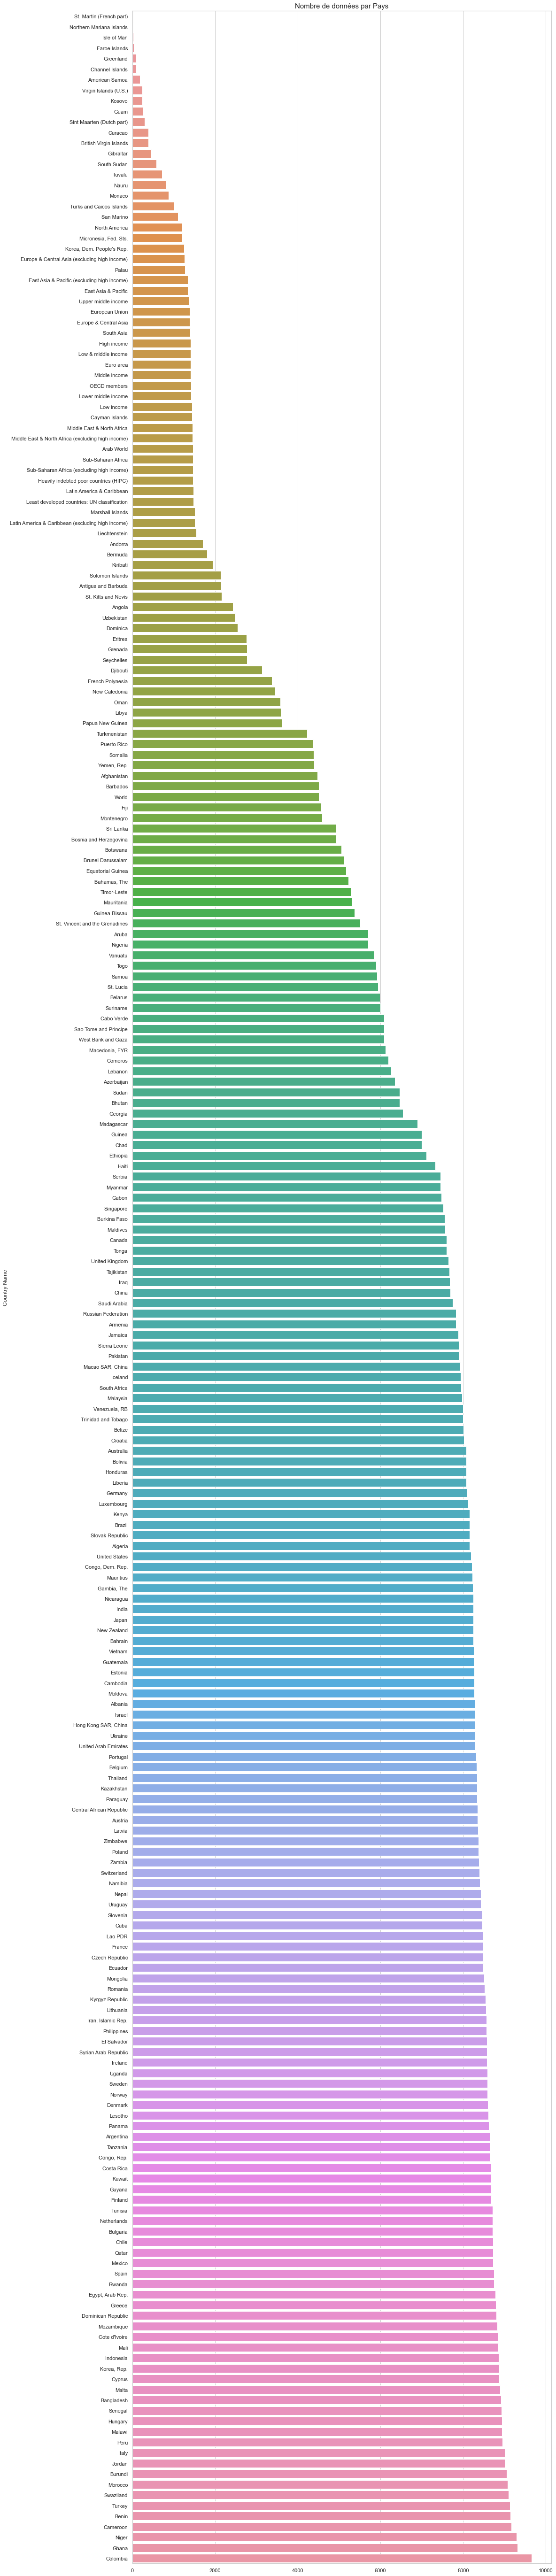

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = dataState.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = dataState.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()

D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


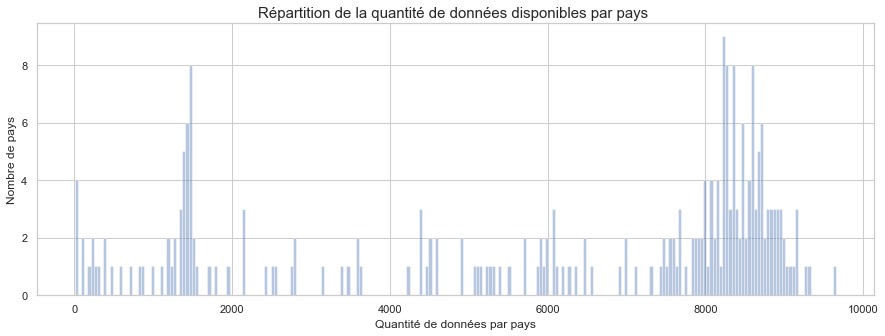

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.xlabel('Quantité de données par pays', size=12)
plt.ylabel('Nombre de pays', size=12)
plt.title('Répartition de la quantité de données disponibles par pays ', size=15)
plot = sns.distplot(dataState.groupby('Country Name')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, bins = 241, norm_hist = False, hist_kws=dict(cumulative=False),
             kde = False)
plt.show()

- Les pays ayant le moins d'informations sont :

- Les "petits" pays (faible superficie/faible population)

- Les régions et les zones économiques (east asia & pacific, upper middle income, ...)


On regroupe les bases de données data et country, de façon à avoir les régions pour chaque pays.

In [59]:
dataState = dataState.merge(right = dataCountry[['Country Code', 'Region']], 
                  on='Country Code', how='left')

In [60]:
dataState.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

In [61]:
data_decades = dataState.copy()

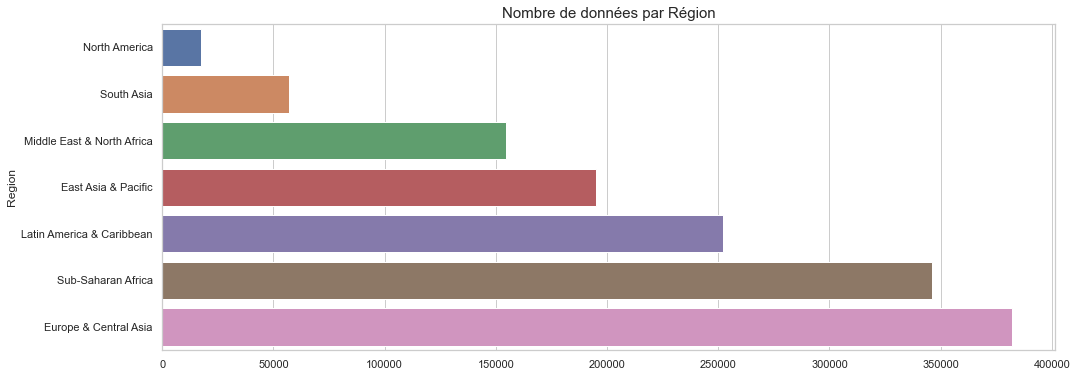

In [62]:
sns.set(style="whitegrid",palette="deep")
plt.figure(figsize=(16, 6))
plt.title('Nombre de données par Région', size=15)
plot = sns.barplot(x = dataState.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().values, 
                   y = dataState.groupby('Region')[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].count().sum(axis=1).sort_values().index)
plt.show()


##### Nous pouvons noter que :
- nous avons beaucoup plus de données pour l'Europe et l'Afrique subsaharienne que l'amérique du nord ou l'Asie du Sud.

- Cela peut expliquer par le nombre de pays dans chaque région du globe.

In [63]:
# Une première analyse sera faite avec les colonnes suivantes :  'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010s', 'Region'
dataState_Short = dataState[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]

In [64]:
dataState_Short[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)

,2010s
Indicator Name,
"Population, total",240
Population growth (annual %),240
GDP per capita (current US$),229
GDP at market prices (current US$),229
Internet users (per 100 people),229
...,...
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade,0
EGRA: Correct Letter Sounds Read Per Minute (Mean). English. 4th Grade,0
"SACMEQ: Mean performance on the reading scale, total",0


D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

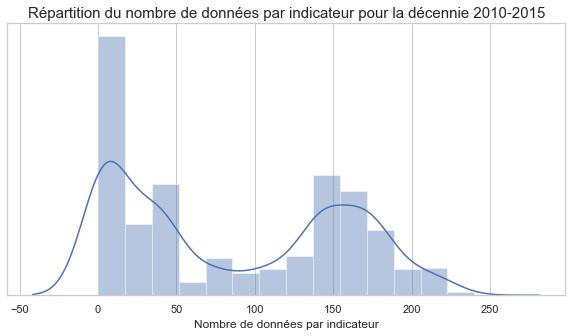

In [65]:
plt.figure(figsize=(10,5))
plt.title('Répartition du nombre de données par indicateur pour la décennie 2010-2015', size=15)
plt.xlabel('Nombre de données par indicateur')
ax = plt.gca()
ax.set_yticks([])
sns.distplot(dataState_Short[['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False))
plt.plot()


Préciser les indicateurs que nous allons choisir pour résoudre notre problématique avec un minium de 80% de données exploitable par régions et pays :

(-) N.B. : sachant chaque pays possède 3 665 indicateurs différents. 

Indicateurs dont le taux de données exploitables > 80% :

Indicateurs liés à l'éducation :

- UIS.E.4 :Enrolment in post-secondary non-tertiary education, both sexes (number)

"Inscriptions dans l'enseignement post-secondaire non supérieur, hommes et femmes (nombre)"

- UIS.E.3 :Enrolment in upper secondary education, both sexes (number)

"Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre)


Dépenses liées à l'éducation
- UIS.X.USCONST.3.FSGOV

Données démographiques:

- SP.POP.1524.TO.UN Population, ages 15-24, total

Percée de l'utilisation d'internet et des ordinateurs:

- IT.NET.USER.P2 Internet users (per 100 people)

In [66]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              ]

In [67]:
groupes_pays = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'Euro area',
         'Europe & Central Asia',
         'Europe & Central Asia (excluding high income)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World']

In [68]:
dataState.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

In [69]:
regions = dataCountry['Region'].unique().tolist()

In [70]:
dataState_Short['NaN'] = dataState_Short[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\444180917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataState_Short['NaN'] = dataState_Short[['Indicator Code', 'Country Name', '2010s']]['2010s'].isna().astype(int)


In [71]:
# Une première analyse sera faite avec les colonnes suivantes :  'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010s', 'Region'
dataState_Short = dataState[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s', 'Region']]

In [72]:
data_heat_countries =  dataState_Short[~dataState_Short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code']].pivot(index='Country Name', columns='Indicator Code' )
data_heat_groupes = dataState_Short[dataState_Short['Country Name'].isin(groupes_pays)][['Country Name', 'Indicator Code']].pivot(index='Country Name', columns='Indicator Code')

In [73]:
dataState[dataState['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

,Indicator Name,Indicator Code,2010s
5,"Population, total",SP.POP.TOTL,240
3,Internet users (per 100 people),IT.NET.USER.P2,229
2,"Enrolment in upper secondary education, both s...",UIS.E.3,206
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,197
4,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,137


In [74]:
data_heat_groupes.head()

Country Name
Arab World
East Asia & Pacific
East Asia & Pacific (excluding high income)
Euro area
Europe & Central Asia


In [75]:
indicateur_groupes = data_heat_groupes.columns.tolist()

In [76]:
data_heat_countries.drop(data_heat_countries.loc[:, data_heat_countries.sum()<= data_heat_countries.shape[0] * 80/100].columns.tolist(), axis=1, inplace=True)

In [77]:
indicateur_countries = data_heat_groupes.columns.tolist()

In [78]:
#On fait l'union des 2 groupes :
indicateurs_a_conserver = list(dict.fromkeys(indicateur_groupes + indicateur_countries))

In [79]:
dataState_Short.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010s,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.47818,NaN


In [80]:
dataState_Short['Indicator Name'].unique().tolist()

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

Suite à la première analyse des données, on peut se focaliser sur la recherche des données par les indicateurs contenus dans ce jeu de donnée.

Préciser les indicateurs que nous allons choisir pour résoudre notre problématique avec un minium de 80% 
de données exploitable par régions et pays :

(-) N.B. : sachant chaque pays possède 3 665 indicateurs différents. 

indicateurs dont le taux de données exploitables > 80% :

##### Indicateurs liés à l'éducation :

- UIS.E.4 :Enrolment in post-secondary non-tertiary education, both sexes (number)

"Inscriptions dans l'enseignement post-secondaire non supérieur, hommes et femmes (nombre)"

- UIS.E.3 :Enrolment in upper secondary education, both sexes (number)

"Inscriptions dans l'enseignement secondaire supérieur, les deux sexes (nombre)


##### Dépenses liées à l'éducation
- UIS.X.USCONST.3.FSGOV

##### Données démographiques:

- SP.POP.1524.TO.UN Population, ages 15-24, total

Percée de l'utilisation d'internet et des ordinateurs:

- IT.NET.USER.P2 Internet users (per 100 people)

In [81]:
indicateurs = ['UIS.E.4',
              'UIS.E.3',
              'SE.TER.ENRL',
              'UIS.X.USCONST.3.FSGOV',
              'SP.POP.TOTL',
              'SP.POP.1524.TO.UN',
              'IT.NET.USER.P2',
              ]

In [82]:
dataState[dataState['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)

,Indicator Name,Indicator Code,2010s
5,"Population, total",SP.POP.TOTL,240
3,Internet users (per 100 people),IT.NET.USER.P2,229
2,"Enrolment in upper secondary education, both s...",UIS.E.3,206
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,197
4,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,137


In [83]:
areas = ['Arab World',
         'East Asia & Pacific',
         'East Asia & Pacific (excluding high income)',
         'East Asia & Pacific (developing only)',
         'East Asia & Pacific (all income levels)',
         'Euro area',
         'European Union'
         'Europe & Centraµl Asia',
         'Europe & Central Asia (excluding high income)',
         'Europe & Central Asia (developing only)',
         'Europe & Central Asia (all income levels)',
         'European Union',
         'Heavily indebted poor countries (HIPC)',
         'High income',
         'Latin America & Caribbean',
         'Latin America & Caribbean (developing only)',
         'Latin America & Caribbean (excluding high income)',
         'Least developed countries: UN classification',
         'Low & middle income',
         'Low income',
         'Lower middle income',
         'Middle East & North Africa',
         'Middle East & North Africa (excluding high income)',
         'Middle East & North Africa (all income levels)',
         'Middle East & North Africa (developing only)',
         'Middle income',
         'North America',
         'OECD members',
         'South Asia',
         'Sub-Saharan Africa',
         'Sub-Saharan Africa (excluding high income)',
         'Upper middle income',
         'World',
        ]

In [84]:
list_countries = dataCountry[~dataCountry["Short Name"].isin(areas)]["Short Name"].unique().tolist()

In [85]:
data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]
data_countries.head()

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\4039624617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]


,Country Name,Country Code,Indicator Name,Indicator Code,2010s,Region
92796,Afghanistan,AFG,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,9.695980e+04,South Asia
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.801890e+05,South Asia
92839,Afghanistan,AFG,"Enrolment in upper secondary education, both s...",UIS.E.3,8.260400e+05,South Asia
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,6.601467e+00,South Asia
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6.679801e+06,South Asia


Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

In [86]:
data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]
data_areas     = dataState_Short[dataState_Short['Country Name'].isin(areas)         ][dataState_Short['Indicator Code'].isin(indicateurs)]

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2823085752.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2823085752.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_areas     = dataState_Short[dataState_Short['Country Name'].isin(areas)         ][dataState_Short['Indicator Code'].isin(indicateurs)]


In [87]:
def description_indicateurs(df, indicateurs, groupe):
    df_per_indicator = pd.DataFrame()
    for indicateur in indicateurs:
        df_temp = df[df['Indicator Code'] == indicateur]
        df_temp[indicateur] = df['2010s']
        df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
   
        if df_per_indicator.empty is False:
            df_per_indicator = df_per_indicator.merge(right = df_temp, how = 'outer', on = ['Country Code', 'Country Name', 'Region']).sort_values(by='Country Name')
        else:
            df_per_indicator = df_temp
            
            
    description = df_per_indicator.groupby([groupe])[indicateurs].describe(percentiles = [0.5])
    for indicateur in indicateurs:
        description[(indicateur, 'sum')] = description[(indicateur, 'count')] * description[(indicateur, 'mean')]
    colonnes = []
    for indicateur in indicateurs:
        for stat in ['mean', 'std', '50%', 'sum'] :
            colonnes += [(indicateur, stat)]
    description = description[colonnes]
    description.reset_index(inplace=True)
    return description, df_per_indicator

In [88]:

data_areas  = dataState_Short[dataState_Short['Country Name'].isin(areas)][dataState_Short['Indicator Code'].isin(indicateurs)]

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\892021031.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_areas  = dataState_Short[dataState_Short['Country Name'].isin(areas)][dataState_Short['Indicator Code'].isin(indicateurs)]


In [89]:
description_zones, df_zones     = description_indicateurs(data_areas, indicateurs, 'Country Name')

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['2010s']
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [90]:
description_zones.head()

Country Name       UIS.E.4      \
                                                          mean std   
0                                     Arab World  2.631211e+05 NaN   
1                            East Asia & Pacific  2.302949e+06 NaN   
2    East Asia & Pacific (excluding high income)  1.844454e+06 NaN   
3                                      Euro area  1.101148e+06 NaN   
4  Europe & Central Asia (excluding high income)  6.241610e+05 NaN   

                                  UIS.E.3                              \
            50%           sum        mean std         50%         sum   
0  2.631211e+05  2.631211e+05  11662032.4 NaN  11662032.4  11662032.4   
1  2.302949e+06  2.302949e+06  69637812.8 NaN  69637812.8  69637812.8   
2  1.844454e+06  1.844454e+06  62314336.0 NaN  62314336.0  62314336.0   
3  1.101148e+06  1.101148e+06  12966761.2 NaN  12966761.2  12966761.2   
4  6.241610e+05  6.241610e+05  13692785.4 NaN  13692785.4  13692785.4   

  SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN              \
         mean  ...           50%           sum              mean std 50% sum   
0   9222392.0  ...  3.587756e+08  3.587756e+08               NaN NaN NaN NaN   
1  60141309.6  ...  2.250835e+09  2.250835e+09               NaN NaN NaN NaN   
2  50806228.8  ...  2.007695e+09  2.007695e+09               NaN NaN NaN NaN   
3  12889542.4  ...  3.376978e+08  3.376978e+08               NaN NaN NaN NaN   
4  19073678.8  ...  4.102482e+08  4.102482e+08               NaN NaN NaN NaN   

  IT.NET.USER.P2                            
            mean std        50%        sum  
0      31.834459 NaN  31.834459  31.834459  
1      43.754148 NaN  43.754148  43.754148  
2      38.968510 NaN  38.968510  38.968510  
3      75.580997 NaN  75.580997  75.580997  
4      51.297737 NaN  51.297737  51.297737  

[5 rows x 29 columns]

In [91]:
list_countries = dataCountry[~dataCountry['Short Name'].isin(areas)]['Short Name'].unique().tolist()

In [92]:
data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2672433541.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_countries = dataState_Short[dataState_Short['Country Name'].isin(list_countries)][dataState_Short['Indicator Code'].isin(indicateurs)]


In [93]:
description_zones, df_zones     = description_indicateurs(data_areas, indicateurs, 'Country Name')

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['2010s']
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [94]:
description_countries, df_countries = description_indicateurs(data_countries, indicateurs, 'Region')

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[indicateur] = df['2010s']
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(['2010s', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\187115242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [95]:
description_countries

Region        UIS.E.4                                \
                                        mean            std            50%   
0         East Asia & Pacific  179427.537019  279200.588624   27841.000000   
1       Europe & Central Asia   50031.265382  133776.183721   10813.000000   
2   Latin America & Caribbean   53614.363158  180525.720490    3103.000000   
3  Middle East & North Africa    9253.450000   10918.928517    5705.125000   
4               North America  799251.325000            NaN  799251.325000   
5                  South Asia  128660.658333  172484.615145   57321.566667   
6          Sub-Saharan Africa   36579.266667   69361.871705    4679.000000   

                      UIS.E.3                                           \
            sum          mean           std          50%           sum   
0  2.332558e+06  3.104989e+06  9.740027e+06   148159.400  6.520477e+07   
1  1.901188e+06  6.133072e+05  9.304212e+05   263745.900  3.066536e+07   
2  1.018673e+06  6.772967e+05  1.758547e+06   124699.625  2.302809e+07   
3  9.253450e+04  4.005455e+05  5.018389e+05   159624.325  6.408728e+06   
4  7.992513e+05  4.468791e+06  6.342389e+06  1675808.500  1.340637e+07   
5  7.719640e+05  9.415460e+06  1.924265e+07  1262076.500  6.590822e+07   
6  6.950061e+05  4.447514e+05  8.523980e+05   136223.100  1.512155e+07   

    SE.TER.ENRL  ...   SP.POP.TOTL               SP.POP.1524.TO.UN  \
           mean  ...           50%           sum              mean   
0  3.029385e+06  ...  2.027884e+06  2.151557e+09      1.461382e+07   
1  6.263273e+05  ...  5.530253e+06  7.537515e+08      2.203308e+06   
2  7.455761e+05  ...  3.578169e+06  5.863286e+08      3.457839e+06   
3  3.503854e+05  ...  7.142249e+06  2.199133e+08      2.167307e+06   
4  1.013747e+07  ...  3.513338e+07  3.514559e+08      2.484806e+07   
5  4.065026e+06  ...  2.985991e+07  1.698974e+09      4.122661e+07   
6  1.769331e+05  ...  1.156291e+07  8.524755e+08      4.068331e+06   

                                            IT.NET.USER.P2             \
            std           50%           sum           mean        std   
0  4.340982e+07  1.438153e+06  3.361179e+08      39.110122  27.014509   
1  2.918516e+06  1.107469e+06  9.694557e+07      66.374672  21.119148   
2  7.053947e+06  1.337724e+06  1.002773e+08      45.178755  17.067168   
3  2.486249e+06  1.042890e+06  3.901152e+07      51.630411  25.062528   
4  2.884377e+07  2.484806e+07  4.969611e+07      83.859491  10.156386   
5  8.182133e+07  6.607114e+06  3.298129e+08      18.698948  11.954131   
6  6.184988e+06  2.361723e+06  1.668016e+08      13.577007  12.049061   

                           
         50%          sum  
0  34.764191  1134.193534  
1  65.785332  3385.108250  
2  45.003936  1536.077659  
3  56.625398   929.347404  
4  85.361429   251.578473  
5  15.420493   149.591586  
6   9.218154   570.234274  

[7 rows x 29 columns]

In [96]:
data_countries.describe

<bound method NDFrame.describe of        Country Name Country Code  \
92796   Afghanistan          AFG   
92829   Afghanistan          AFG   
92839   Afghanistan          AFG   
93000   Afghanistan          AFG   
94107   Afghanistan          AFG   
...             ...          ...   
884469     Zimbabwe          ZWE   
884479     Zimbabwe          ZWE   
884640     Zimbabwe          ZWE   
885747     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
92796   Enrolment in post-secondary non-tertiary educa...            UIS.E.4   
92829   Enrolment in tertiary education, all programme...        SE.TER.ENRL   
92839   Enrolment in upper secondary education, both s...            UIS.E.3   
93000                     Internet users (per 100 people)     IT.NET.USER.P2   
94107                       Population, ages 15-24, total  SP.POP.1524.TO.UN   
...                                                  

In [97]:
data_countries.pivot(index=["Country Name","Region"], columns="Indicator Code", values="2010s").groupby("Region").agg(['min', 'max', 'mean', 'std'])

Indicator Code             IT.NET.USER.P2                                   \
                                      min        max       mean        std   
Region                                                                       
East Asia & Pacific              5.125934  85.306401  39.110122  27.014509   
Europe & Central Asia            9.997557  96.509472  66.374672  21.119148   
Latin America & Caribbean       10.514329  78.554812  45.178755  17.067168   
Middle East & North Africa       9.576368  84.568775  51.630411  25.062528   
North America                   73.035771  93.181273  83.859491  10.156386   
South Asia                       6.601467  43.770664  18.698948  11.954131   
Sub-Saharan Africa               0.894407  49.095576  13.577007  12.049061   

Indicator Code              SE.TER.ENRL                              \
                                    min           max          mean   
Region                                                                
East Asia & Pacific          863.000000  3.572066e+07  3.029385e+06   
Europe & Central Asia        507.000000  4.701843e+06  6.263273e+05   
Latin America & Caribbean    145.500000  7.437028e+06  7.455761e+05   
Middle East & North Africa  3965.000000  1.251994e+06  3.503854e+05   
North America               1191.333333  2.027375e+07  1.013747e+07   
South Asia                  6089.000000  2.775808e+07  4.065026e+06   
Sub-Saharan Africa           408.000000  1.453978e+06  1.769331e+05   

Indicator Code                           SP.POP.1524.TO.UN                ...  \
                                     std               min           max  ...   
Region                                                                    ...   
East Asia & Pacific         8.077084e+06      2.265900e+04  2.087167e+08  ...   
Europe & Central Asia       9.512607e+05      4.481617e+04  1.380749e+07  ...   
Latin America & Caribbean   1.548927e+06      1.386183e+04  3.353126e+07  ...   
Middle East & North Africa  4.031066e+05      5.388100e+04  6.869491e+06  ...   
North America               1.433487e+07      4.452427e+06  4.524368e+07  ...   
South Asia                  9.607159e+06      7.393917e+04  2.401628e+08  ...   
Sub-Saharan Africa          3.084462e+05      1.135612e+05  3.472347e+07  ...   

Indicator Code               SP.POP.TOTL                UIS.E.3               \
                                    mean           std      min          max   
Region                                                                         
East Asia & Pacific         6.723616e+07  2.413255e+08    353.0  44626746.40   
Europe & Central Asia       1.395836e+07  2.079457e+07   1222.0   4105284.75   
Latin America & Caribbean   1.584672e+07  3.842041e+07    746.0   9517932.50   
Middle East & North Africa  1.221741e+07  1.287527e+07  14398.6   1673103.00   
North America               1.171520e+08  1.733197e+08   2234.2  11728330.80   
South Asia                  2.123718e+08  4.363642e+08  16081.8  52826961.00   
Sub-Saharan Africa          1.982501e+07  3.005546e+07   3053.4   4046541.00   

Indicator Code                                                UIS.E.4  \
                                    mean           std            min   
Region                                                                  
East Asia & Pacific         3.104989e+06  9.740027e+06     866.000000   
Europe & Central Asia       6.133072e+05  9.304212e+05     132.000000   
Latin America & Caribbean   6.772967e+05  1.758547e+06      18.000000   
Middle East & North Africa  4.005455e+05  5.018389e+05     219.500000   
North America               4.468791e+06  6.342389e+06  799251.325000   
South Asia                  9.415460e+06  1.924265e+07     261.666667   
Sub-Saharan Africa          4.447514e+05  8.523980e+05     334.600000   

Indicator Code                                                          
                                     max           mean            std  
Region             

Text(0.5, 1.0, 'Moyenne des populations[15-24 ans] par Region')

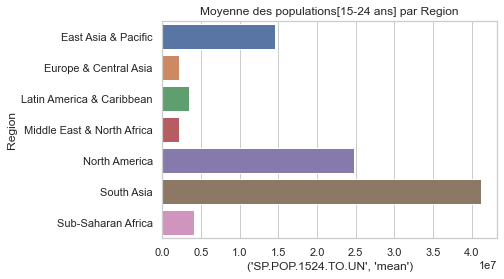

In [98]:
sns.barplot(x= description_countries[('SP.POP.1524.TO.UN','mean')], y=description_countries['Region'])
plt.title("Moyenne des populations[15-24 ans] par Region")

## Tableaux récapitulatifs des indicateurs par zone géographique :

In [99]:
data_orig = dataState.copy()

In [100]:
data_orig[data_orig['Indicator Code'] == 'UIS.E.4']['Indicator Name'].unique()[0]

'Enrolment in post-secondary non-tertiary education, both sexes (number)'

In [101]:
data_orig[data_orig['Indicator Code'].isin(['UIS.X.USCONST.3.FSGOV'])].count().sum()

0

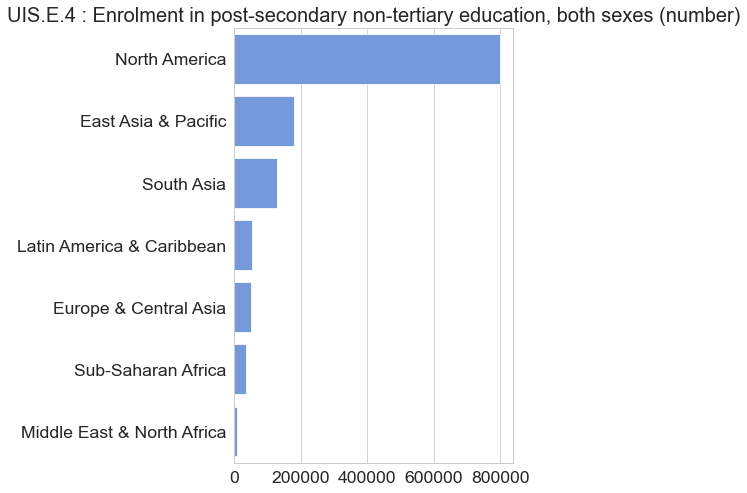

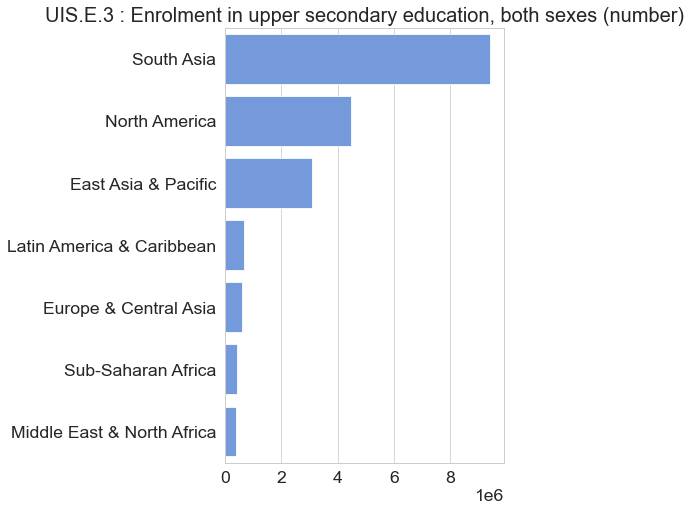

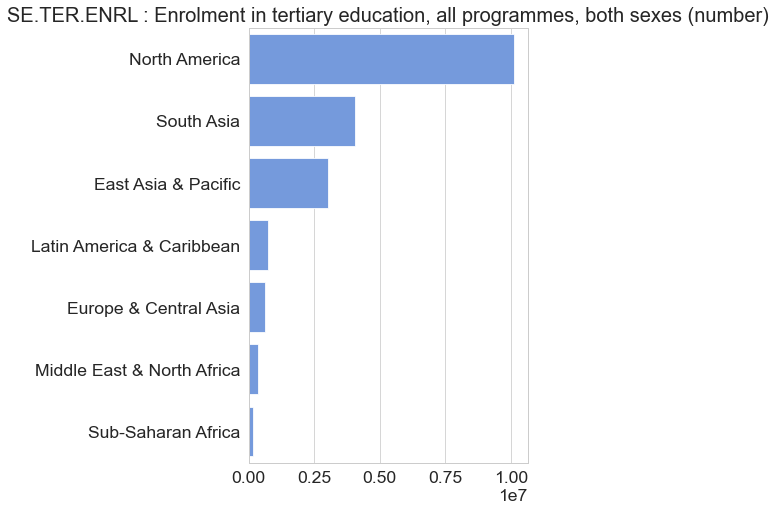



UIS.X.USCONST.3.FSGOV  : Aucune donnée à afficher.


<Figure size 360x576 with 0 Axes>

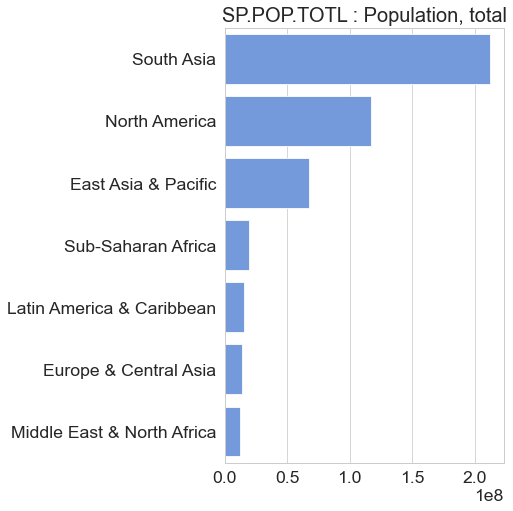

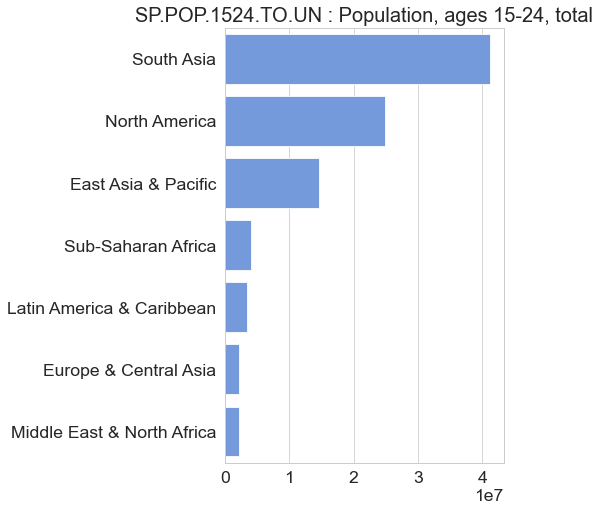

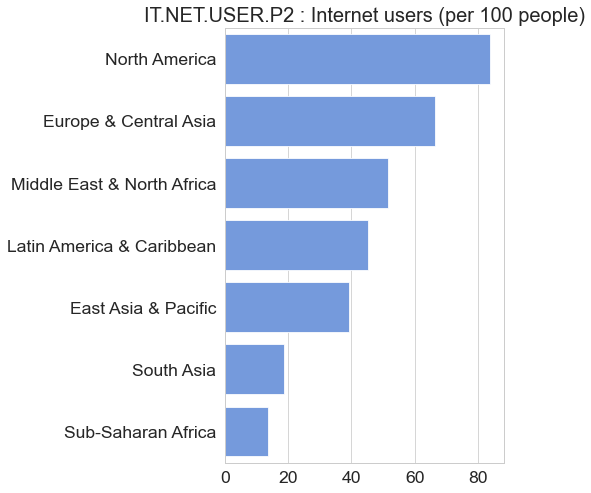

In [102]:
for indicateur in indicateurs:
    plt.figure(figsize = (5,8))
    sns.set_context("paper", font_scale=2)
    if data_orig[data_orig['Indicator Code'].isin([indicateur])].count().sum() > 0 :
        chaine = indicateur + ' : ' + data_orig[data_orig['Indicator Code'] == indicateur]['Indicator Name'].unique()[0]
        plt.title(chaine, size=20)
        description_countries.sort_values(by=(indicateur, 'mean'), ascending=False, inplace=True)
        ax = plt.gca()
        sns.barplot(x = description_countries[(indicateur, 'mean')], y=description_countries['Region'], color='cornflowerblue')
        ax.set_ylabel('')    
        ax.set_xlabel('')
        plt.show()
        print('\n')
    else:
        print(indicateur, ' : Aucune donnée à afficher.')

In [103]:
data_countries.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2010s,Region
92796,Afghanistan,AFG,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,96959.8,South Asia
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,180189.0,South Asia


D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


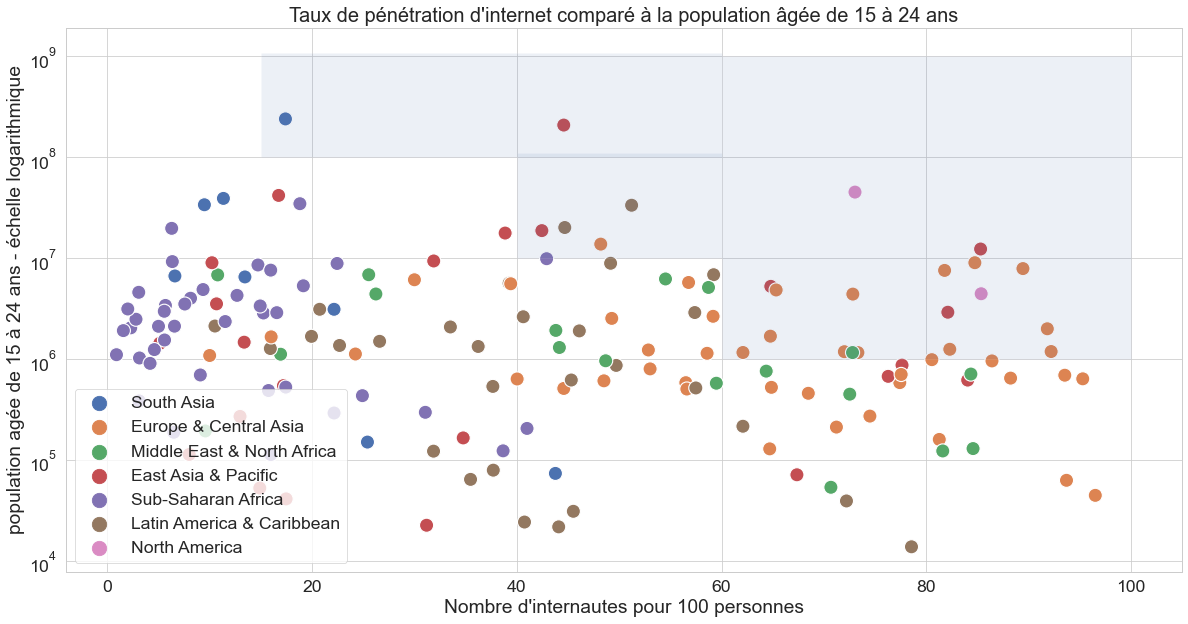

In [104]:
import matplotlib.patches as patches
plt.figure(figsize = (20,10))
ax = plt.gca()
sns.set_context("paper", font_scale=2)
sns.scatterplot(df_countries['IT.NET.USER.P2'], df_countries['SP.POP.1524.TO.UN'], hue=df_countries['Region'], s=200)
plt.xlabel('Nombre d\'internautes pour 100 personnes')
ax.add_patch(patches.Rectangle((15, 100000000), 45, 990000000, alpha=0.1))
ax.add_patch(patches.Rectangle((40, 10000000), 20, 99900000, alpha=0.1))
ax.add_patch(patches.Rectangle((60, 1000000), 40, 999000000, alpha=0.1))

plt.legend(loc='lower left',markerscale=3)

#legend_elemnts = [patches.Patch(alpha=0.1, label='Potential customers')]
#plt.legend(handles = legend_elements, loc='lower left',markerscale=3)


ax.set_yscale('log')
plt.ylabel('population agée de 15 à 24 ans - échelle logarithmique')
plt.title('Taux de pénétration d\'internet comparé à la population âgée de 15 à 24 ans', size=20)
plt.show()

On imagine que les régions en "Marron ,rouge et rose"  pourraient former un bon vivier de clients potentiels :

- Population jeune importante à très importante avec Internet moyennement développé
- La population jeune, relativement, importe conjuguée à un nombre d'internautes élevé.

Il faut maintenant en avoir la confirmation en déterminant le nombre de clients potentiels.

In [105]:
df_countries[((df_countries['IT.NET.USER.P2'] > 15) & (df_countries['SP.POP.1524.TO.UN'] > 100000000))  |  ((df_countries['IT.NET.USER.P2'] > 60) & (df_countries['SP.POP.1524.TO.UN'] > 1000000))].sort_values(by='SP.POP.1524.TO.UN',ascending = False)[['Country Name']]

,Country Name
78,India
38,China
189,United States
86,Japan
62,Germany
188,United Kingdom
58,France
106,Malaysia
140,Poland
32,Canada


#### Analyse:

- très important nombre de lycéens et d'étudiants dans le supérieur en East Asia & Pacific
- taux de pénétration d'internet le plus élevé en amérique du nord, europe et asie centrale, moyen en east asia & pacific
Pour l'analyse, j'aimerais connaître :

le nombre de lycéens et étudiants par pays:

- une estimation du nombre de lycéens avec internet par pays
- l'évolution du taux de pénétration d'internet par pays

In [106]:
#Quels sont les pays avec un fort potentiel de clients pour nos services ?
#on va créer un indicateur lycée + supérieur:

df_countries['customers'] = df_countries['UIS.E.3'] + df_countries['UIS.E.4'] + df_countries['SE.TER.ENRL'] 
print('liste des pays avec le plus de lycéens et étudiants')
df_countries.sort_values(by='customers', ascending=False)[['Country Name', 'customers']].head(20)

liste des pays avec le plus de lycéens et étudiants


,Country Name,customers
78,India,8.103193e+07
38,China,8.083619e+07
189,United States,3.280134e+07
25,Brazil,1.774776e+07
86,Japan,7.552915e+06
14,Bangladesh,7.498949e+06
62,Germany,6.343626e+06
133,Pakistan,6.309889e+06
188,United Kingdom,5.770901e+06
139,Philippines,5.597267e+06


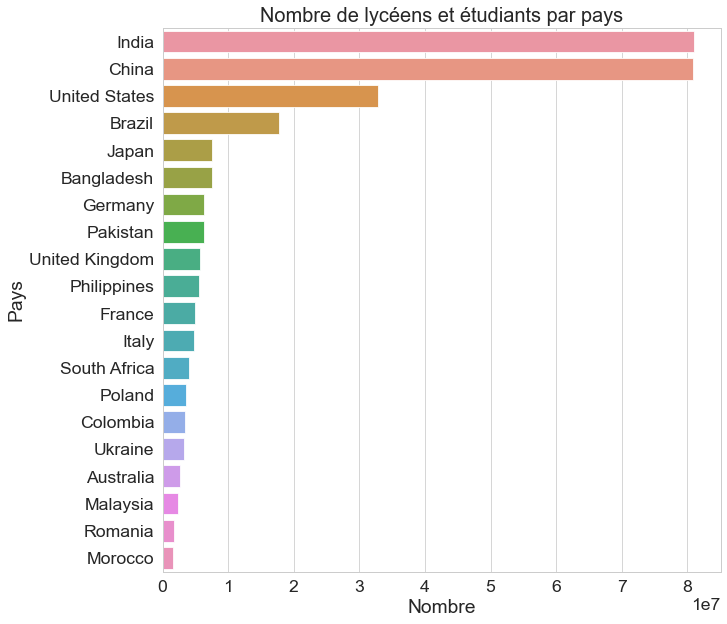

In [107]:
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)

ax = plt.gca()
sns.barplot(x = df_countries.sort_values(by='customers', ascending=False)['customers'].head(20), y=df_countries.sort_values(by='customers', ascending=False)['Country Name'].head(20))
plt.title('Nombre de lycéens et étudiants par pays', size=20)
plt.xlabel('Nombre')
plt.ylabel('Pays')
plt.show()

In [108]:
#on va multiplier ce nombre avec le taux de pénétration d'internet pour avoir une estimation du nombre de clients potentiels:
df_countries['potential_customers'] = df_countries['customers'] * df_countries['IT.NET.USER.P2']/100

On peut avoir une estimation du nombre de clients potentiels en multipliant le nombre d'étudiants et lycéens par la part d'utilisation d'internet

In [109]:
df_countries.sort_values(by='potential_customers', ascending=False)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].head(20)

,Country Name,IT.NET.USER.P2,customers,potential_customers
38,China,44.585731,8.083619e+07,3.604141e+07
189,United States,73.035771,3.280134e+07,2.395671e+07
78,India,17.399603,8.103193e+07,1.409923e+07
25,Brazil,51.214529,1.774776e+07,9.089430e+06
86,Japan,85.306401,7.552915e+06,6.443120e+06
62,Germany,84.745271,6.343626e+06,5.375923e+06
188,United Kingdom,89.441457,5.770901e+06,5.161578e+06
58,France,81.789500,4.954075e+06,4.051913e+06
84,Italy,56.780535,4.734863e+06,2.688480e+06
139,Philippines,42.447732,5.597267e+06,2.375913e+06


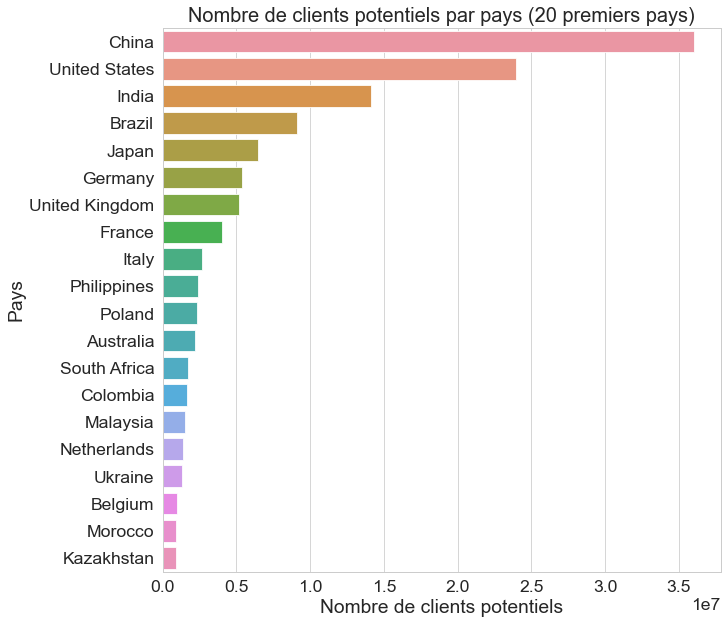

In [110]:
clients_potentiels = df_countries.sort_values(by='potential_customers', na_position='first', ascending=True)[['Country Name', 'IT.NET.USER.P2', 'customers', 'potential_customers']].tail(20).sort_values(by='potential_customers',ascending=False)
plt.figure(figsize = (10,10))
sns.set_context("paper", font_scale=2)
plt.title('Nombre de clients potentiels par pays (20 premiers pays)', fontsize=20)
ax = plt.gca()
sns.barplot(x = clients_potentiels['potential_customers'], y=clients_potentiels['Country Name'])
plt.xlabel('Nombre de clients potentiels')
plt.ylabel('Pays')
plt.show()

In [111]:
#on garde les pays potentiels avec plus de 1 million de clients potentiels
selected_countries = clients_potentiels[clients_potentiels['potential_customers'] > 1000000]['Country Name'].tolist()
print(selected_countries)

['China', 'United States', 'India', 'Brazil', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Philippines', 'Poland', 'Australia', 'South Africa', 'Colombia', 'Malaysia', 'Netherlands', 'Ukraine']


Maintenant, qu'on a la liste des pays avec le plus de clients potentiels, il faut regarder :
- la tendance d'évolution du nombre d'étudiants
- l'évolution de l'implantation d'internet dans le pays

In [112]:
future = {}
for country in selected_countries:
    future[country] = (data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.3')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'UIS.E.4')]['2020s'].values
              +data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'SE.TER.ENRL')]['2020s'].values)*data_decades[(data_decades['Country Name'] == country) & (data_decades['Indicator Code'] == 'IT.NET.USER.P2')]['2020s'].values/100

In [113]:
future

{'China': array([nan]),
 'United States': array([nan]),
 'India': array([nan]),
 'Brazil': array([nan]),
 'Japan': array([nan]),
 'Germany': array([nan]),
 'United Kingdom': array([nan]),
 'France': array([nan]),
 'Italy': array([nan]),
 'Philippines': array([nan]),
 'Poland': array([nan]),
 'Australia': array([nan]),
 'South Africa': array([nan]),
 'Colombia': array([nan]),
 'Malaysia': array([nan]),
 'Netherlands': array([nan]),
 'Ukraine': array([nan])}

In [114]:
data_orig1 = dataStates.copy()

In [115]:
data_final = data_orig1[data_orig1['Country Name'].isin(selected_countries) & data_orig1['Indicator Code'].isin(['UIS.E.3', 'UIS.E.4', 'SE.TER.ENRL', 'IT.NET.USER.P2'])]

In [116]:
data_final.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
129446,Australia,AUS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129479,Australia,AUS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,179664.0,193532.0,208149.0,223855.0,252972.0,274738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129489,Australia,AUS,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data_final_melt = data_final.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'], var_name = 'Year', value_name = 'Value')

In [118]:
data_final_melt['Year'] = data_final_melt['Year'].astype('int32')

In [119]:
data_final_melt = data_final_melt[data_final_melt['Year'] >= 2010]

In [120]:
data_final.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
129446,Australia,AUS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129479,Australia,AUS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,179664.0,193532.0,208149.0,223855.0,252972.0,274738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129489,Australia,AUS,"Enrolment in upper secondary education, both s...",UIS.E.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data_final_melt.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
2720,Australia,AUS,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2010,216052.0
2721,Australia,AUS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2010,1276488.0
2722,Australia,AUS,"Enrolment in upper secondary education, both s...",UIS.E.3,2010,990951.0


In [122]:
selected_countries

['China',
 'United States',
 'India',
 'Brazil',
 'Japan',
 'Germany',
 'United Kingdom',
 'France',
 'Italy',
 'Philippines',
 'Poland',
 'Australia',
 'South Africa',
 'Colombia',
 'Malaysia',
 'Netherlands',
 'Ukraine']

C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2644432036.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2644432036.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
D:\COURS LP DATA RIZZA\python anaconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehme\AppData\Local\Temp\ipykernel_9804\2644432036.py:4: UserWarning: Boolean Series key will be 

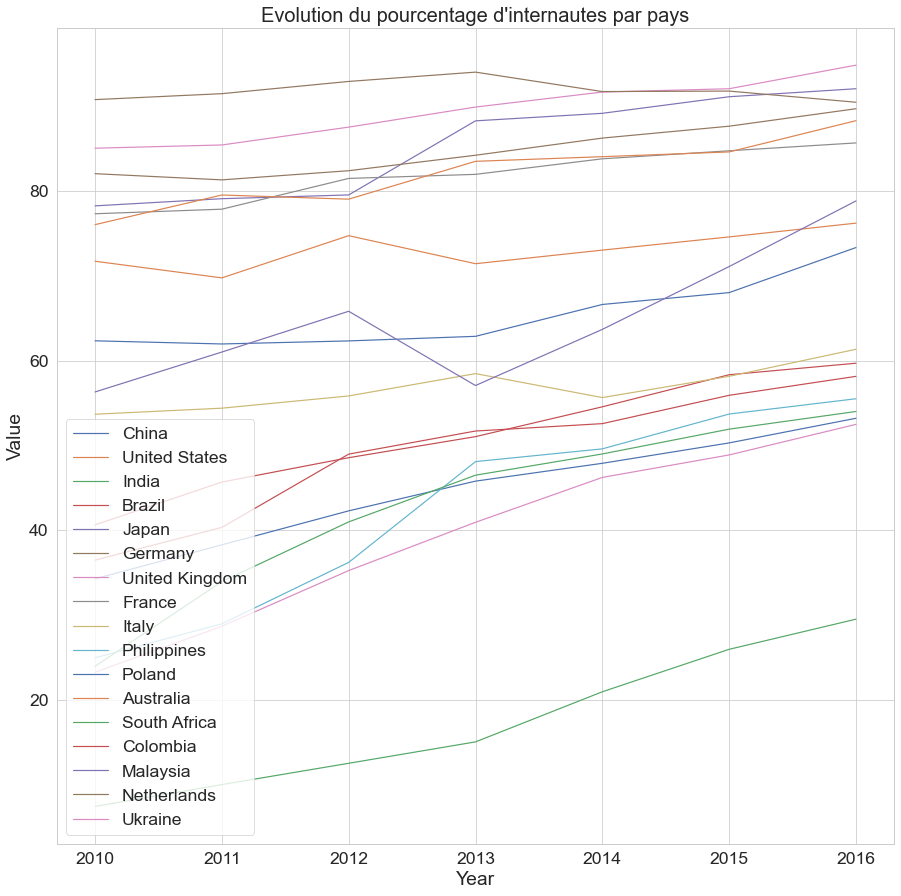

In [123]:
#Graphique: Evolution du pourcentage d'internautes par pays
plt.figure(figsize = (15,15))
for country in selected_countries:
    sns.lineplot(data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Year'],
            data_final_melt[data_final_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_final_melt['Country Name'] == country ]['Value'])
plt.legend(selected_countries, loc = 'lower left', )
plt.title('Evolution du pourcentage d\'internautes par pays', size=20)
plt.show()

Le graphe nous indique que :

 Sur la décennie [2010-2015], l'ensemble des pays sélectionner voit leurs pourcentages d'internautes par pays" augmenter ! -> avec tendance qui semblerait se prolonger sur les années à venir.

 Par contre certain de ces pays possède une "pente"(évolution) plus accentuée (l'exemple de l'Inde et de la France ou l'Indre semble avoir un potentiel plus élévées !)

- Nous pouvons ont déduire : 

Que les pays qui ont une tendance haussière importante du nombre de clients vont continuer à voir cette part croitre dans les prochaines années.

Que les pays où les projections d'augmentation de la population sont importantes verront le nombre d'étudiants augmenter et donc le nombre de clients potentiels.

### Conclusion

Selon l'ensemble des analyses effectuer précédement et les données exploiter :
    - Celle-ci nous indique que les Pays qui ont le potentiels de répondre au mieux à notre "Problèmatique" sont dans l'ordre : 
    
    Chine
    Inde
    Etats Unis
    Brésil
    Japon
 
- Car les pays qui ont une tendance haussière importante du nombre de clients vont continuer à voir cette part croître dans les prochaines années.

- Certains pays dont le taux d'accès à Internet était faible auparavant, verront leurs utilisateurs à Internet augmenter sur les années à venir.

- Et que certains pays de la liste pré-sélectionner ont un potentiel plus élevé que d'autre de part : l'évolution démographique plus accentuée ainsi que leur l'apparition d'un nouveau marché à l'accès qui n'existe pas dans d'autres pays : nous pouvons citer : la Chine, l'Inde et le Brésil ! 
 